In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Summary

The below dataset pertains to usage of pesticides in crops. From this we need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons. This is a classification study.

### Calling Train Data

In [2]:
#calling the training data
ds_ag_train=pd.read_csv("train_agriculture.csv")
ds_ag_train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


### Calling Test Data

In [3]:
#calling the testing data
ds_ag_test=pd.read_csv("test_agriculture.csv")
ds_ag_test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


### Checking Data Shapes

In [4]:
ds_ag_train.shape

(4599, 10)

In [5]:
ds_ag_test.shape

(1199, 9)

In [6]:
#adding three more columns to the dataset to indentify which belongs to training and testing and also indentifying the target variable
ds_ag_train['Source']='50'  #50 refers to train data
ds_ag_test['Source']='100'  #100 refers to testing data
ds_ag_test['Crop_Damage']=5  #used a dummy number 5 for the time being later we will delete it

### Joining Training and Testing DataFrame 

In [7]:
#joining the training and testing dataframe to create a single dataframe 
ds_ag=pd.concat([ds_ag_train,ds_ag_test])
ds_ag

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Source
0,F00000001,188,1,0,1,0,0.0,0,1,0,50
1,F00000003,209,1,0,1,0,0.0,0,2,1,50
2,F00000004,257,1,0,1,0,0.0,0,2,1,50
3,F00000005,257,1,1,1,0,0.0,0,2,1,50
4,F00000006,342,1,0,1,0,0.0,0,2,1,50
...,...,...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3,5,100
1195,F00003135,1132,0,1,2,40,25.0,3,1,5,100
1196,F00003138,1132,0,1,2,20,13.0,23,1,5,100
1197,F00003149,1212,0,1,2,10,35.0,5,1,5,100


### Describing Information

In [8]:
ds_ag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5798 entries, 0 to 1198
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5798 non-null   object 
 1   Estimated_Insects_Count  5798 non-null   int64  
 2   Crop_Type                5798 non-null   int64  
 3   Soil_Type                5798 non-null   int64  
 4   Pesticide_Use_Category   5798 non-null   int64  
 5   Number_Doses_Week        5798 non-null   int64  
 6   Number_Weeks_Used        5237 non-null   float64
 7   Number_Weeks_Quit        5798 non-null   int64  
 8   Season                   5798 non-null   int64  
 9   Crop_Damage              5798 non-null   int64  
 10  Source                   5798 non-null   object 
dtypes: float64(1), int64(8), object(2)
memory usage: 543.6+ KB


### Finding Null Values

In [9]:
ds_ag.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          561
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
Source                       0
dtype: int64

### Replacing Missing Values

In [10]:
#replacing missing values
for col in ["Number_Weeks_Used"]:
    ds_ag[col].fillna(ds_ag[col].mean(),inplace=True)

In [11]:
#re_checking missing values
ds_ag.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
Source                     0
dtype: int64

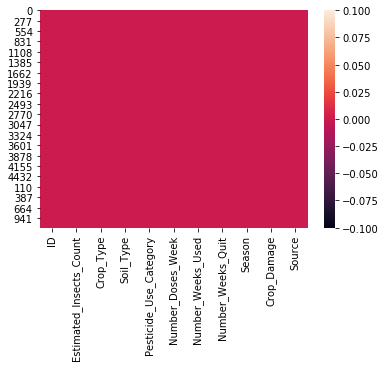

In [12]:
#plotting Null Values in a heatmap
sns.heatmap(ds_ag.isnull())

### Describing Statistics

In [13]:
#describing statistical information related to the dataframe
ds_ag.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000
mean,1347.643153,0.218524,0.472232,2.304243,26.493618,28.920374,8.760262,1.891687,1.188168
std,821.330403,0.413280,0.499271,0.484594,15.655508,11.999136,9.582781,0.692997,1.988136
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1132.000000,0.000000,0.000000,2.000000,20.000000,28.920374,6.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,15.000000,2.000000,1.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,5.000000


### Plotting Co-Relation

In [14]:
ds_ag.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.024004,-0.190848,-0.015056,-0.122206,0.441158,0.228822,-0.002287,0.000528
Crop_Type,-0.024004,1.000000,-0.127340,0.373412,-0.164966,0.010653,-0.290973,0.003754,-0.025279
Soil_Type,-0.190848,-0.127340,1.000000,0.044193,0.051543,-0.103188,-0.062686,-0.005204,-0.027668
Pesticide_Use_Category,-0.015056,0.373412,0.044193,1.000000,-0.006929,0.375475,-0.574041,0.009279,0.117111
Number_Doses_Week,-0.122206,-0.164966,0.051543,-0.006929,1.000000,0.104705,-0.024209,0.002751,-0.001328
Number_Weeks_Used,0.441158,0.010653,-0.103188,0.375475,0.104705,1.000000,-0.428203,-0.004652,0.046187
Number_Weeks_Quit,0.228822,-0.290973,-0.062686,-0.574041,-0.024209,-0.428203,1.000000,0.010324,-0.117204
Season,-0.002287,0.003754,-0.005204,0.009279,0.002751,-0.004652,0.010324,1.000000,-0.010246
Crop_Damage,0.000528,-0.025279,-0.027668,0.117111,-0.001328,0.046187,-0.117204,-0.010246,1.000000


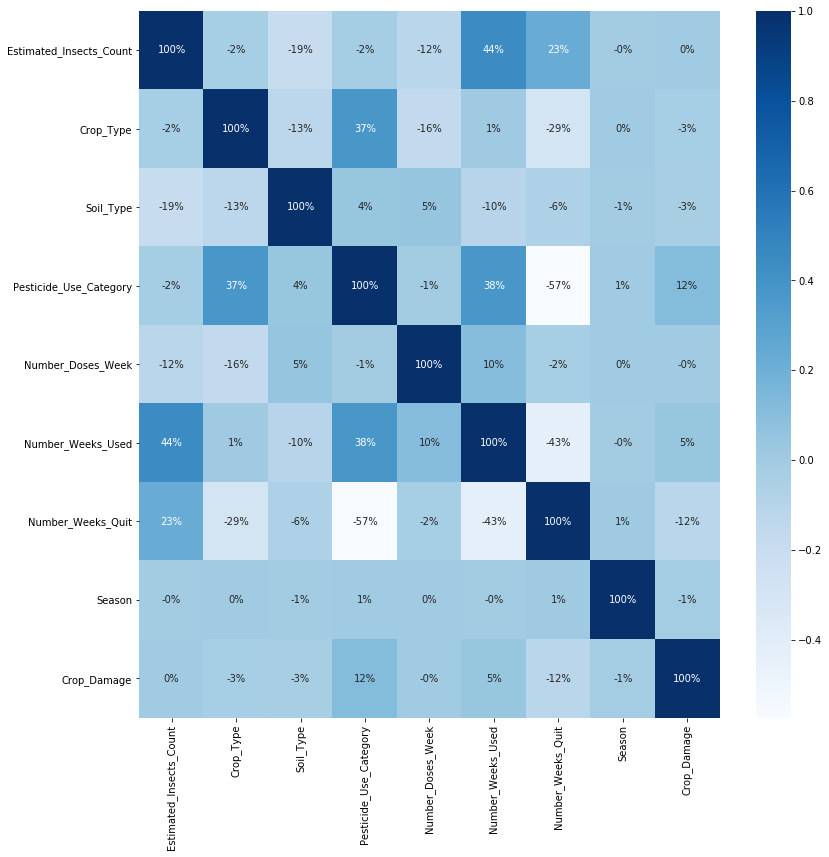

In [15]:
#plotting correlation in a heatmap
corr_hmap=ds_ag.corr()
plt.figure(figsize=(13,13))
sns.heatmap(corr_hmap,annot=True,fmt=".0%",cmap="Blues")
plt.show()

Text(0.5, 1.0, 'Correlation wih target variable')

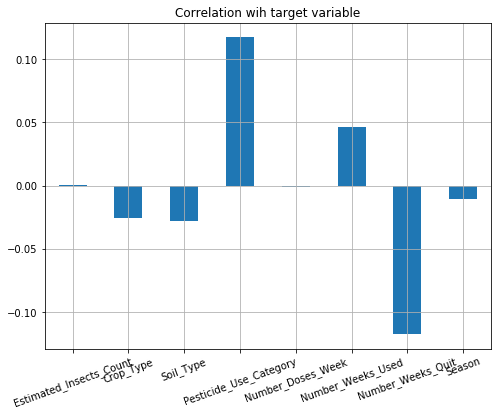

In [16]:
#plotting a corelation graph
plt.figure(figsize=(8,6))
ds_ag.drop("Crop_Damage",axis=1).corrwith(ds_ag["Crop_Damage"]).plot(kind="bar",grid=True)
plt.xticks(rotation=20)
plt.title("Correlation wih target variable")

### Univariate Analysis

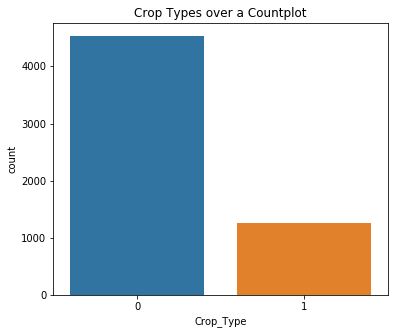

In [17]:
#plotting Crop Category over a countplot
plt.figure(figsize=(6,5))
plt.title("Crop Types over a Countplot")
sns.countplot(x="Crop_Type",data=ds_ag)

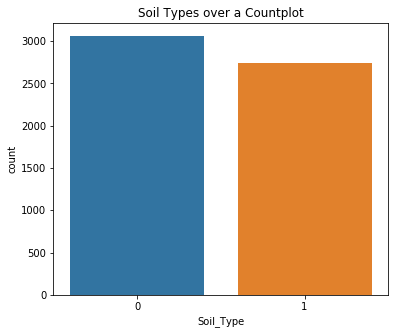

In [18]:
#plotting Soil Category over a countplot
plt.figure(figsize=(6,5))
plt.title("Soil Types over a Countplot")
sns.countplot(x="Soil_Type",data=ds_ag)

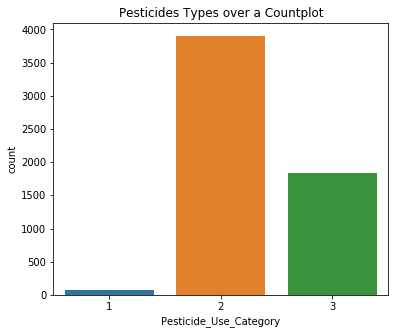

In [19]:
#plotting pesticides Category over a countplot
plt.figure(figsize=(6,5))
plt.title("Pesticides Types over a Countplot")
sns.countplot(x="Pesticide_Use_Category",data=ds_ag)

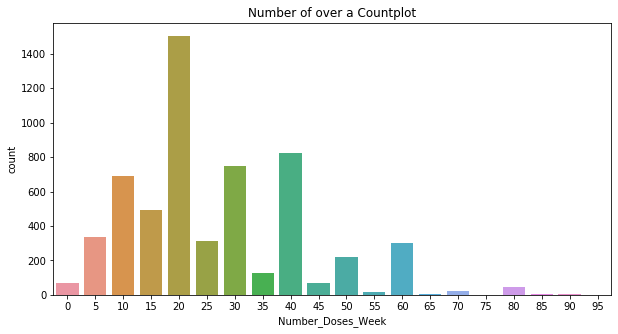

In [20]:
#plotting Number of Doses per week over a countplot
plt.figure(figsize=(10,5))
plt.title("Number of over a Countplot")
sns.countplot(x="Number_Doses_Week",data=ds_ag)

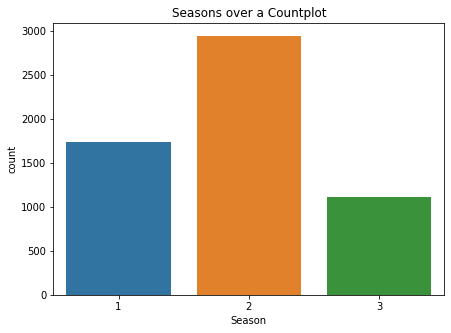

In [21]:
#plotting Number of seasonsover a countplot
plt.figure(figsize=(7,5))
plt.title("Seasons over a Countplot")
sns.countplot(x="Season",data=ds_ag)

### Bivariate Analysis

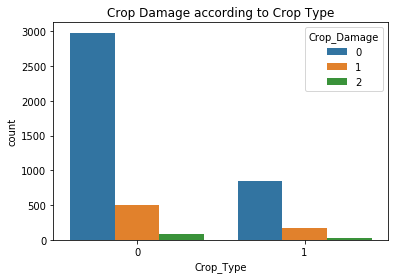

In [22]:
#plotting Crop Damage and Crop Types over a countplot
sns.countplot(x="Crop_Type",hue="Crop_Damage",data=ds_ag_train)
plt.title("Crop Damage according to Crop Type")
plt.show()

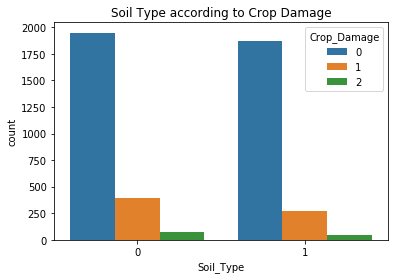

In [23]:
#plotting Crop Damage and Soil Types over a countplot
sns.countplot(x="Soil_Type",hue="Crop_Damage",data=ds_ag_train)
plt.title("Soil Type according to Crop Damage")
plt.show()

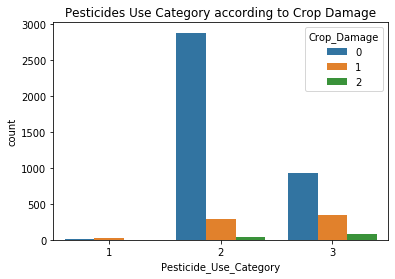

In [24]:
#plotting Crop Damage and Pesticide Categories over a countplot
sns.countplot(x="Pesticide_Use_Category",hue="Crop_Damage",data=ds_ag_train)
plt.title("Pesticides Use Category according to Crop Damage")
plt.show()

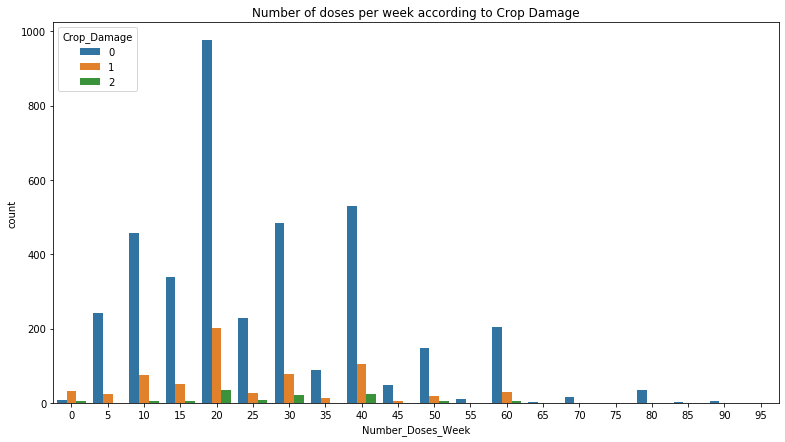

In [25]:
#plotting Crop Damage and Doses per week over a countplot
plt.figure(figsize=(13,7))
sns.countplot(x="Number_Doses_Week",hue="Crop_Damage",data=ds_ag_train)
plt.title("Number of doses per week according to Crop Damage")
plt.show()

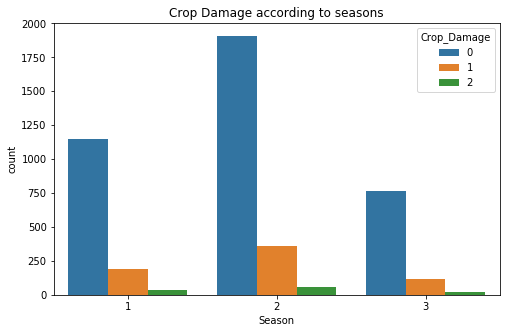

In [26]:
#plotting Crop Damage and Doses per week over a countplot
plt.figure(figsize=(8,5))
sns.countplot(x="Season",hue="Crop_Damage",data=ds_ag_train)
plt.title("Crop Damage according to seasons")
plt.show()

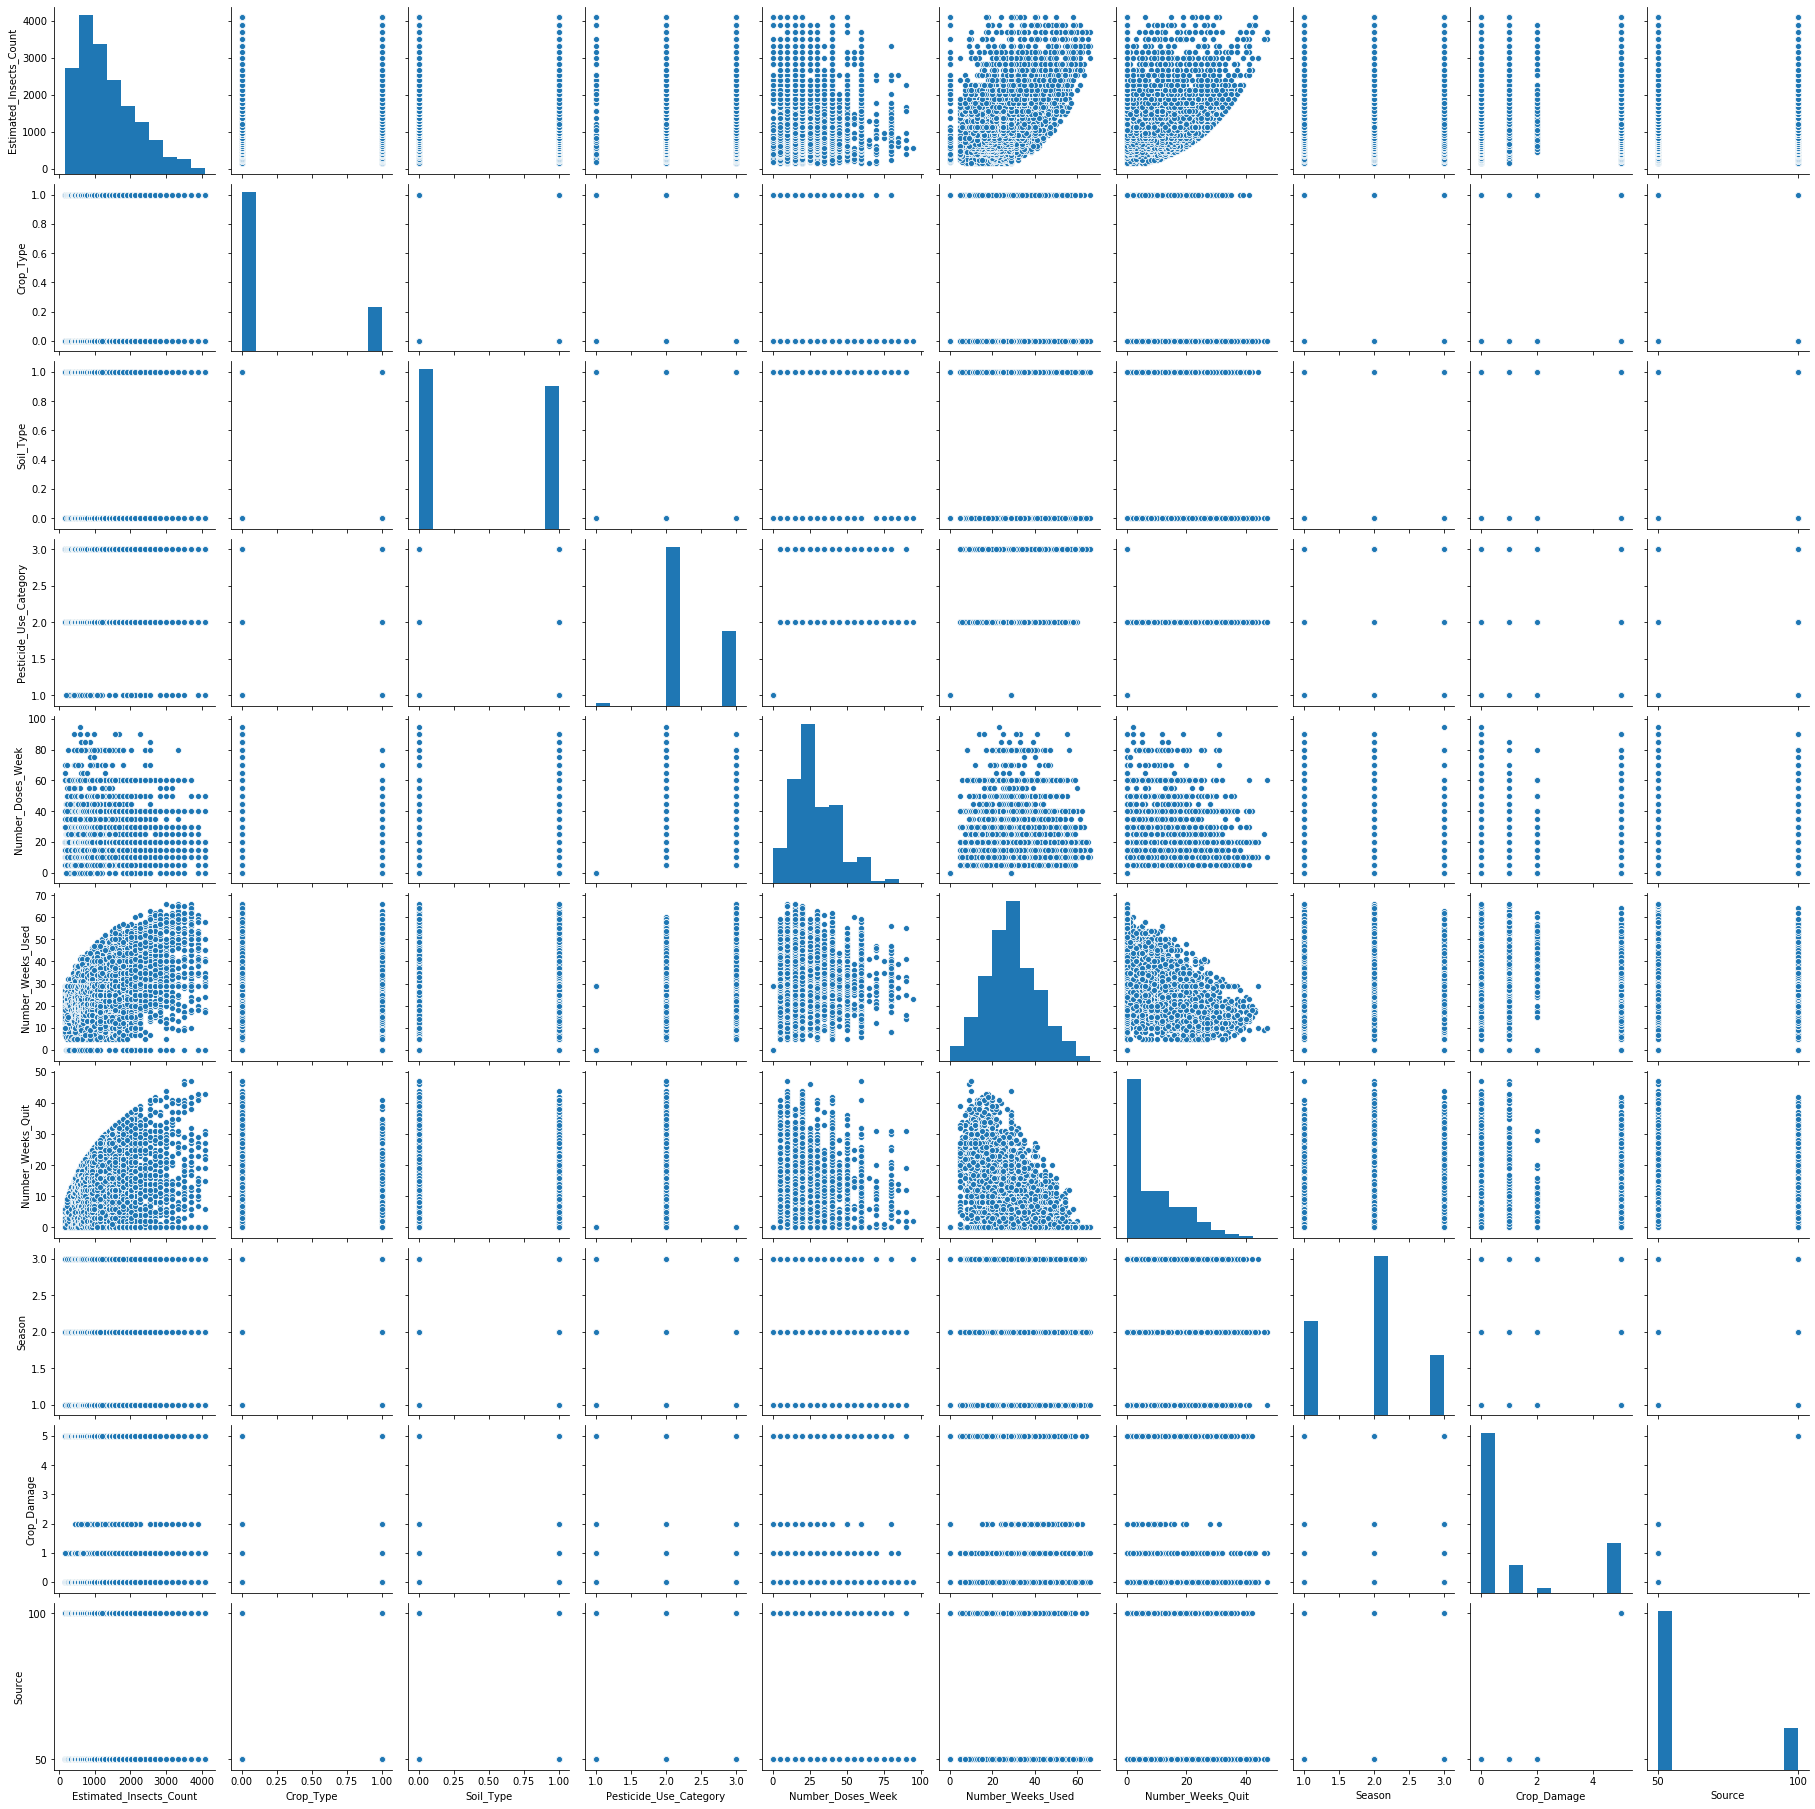

In [27]:
#plotting pairplot to shows relationship of all the variables with another
sns.pairplot(ds_ag)

### Dropping Columns

In [28]:
#we will be droppin the lesser important columns which we will not consider in making the model.
ds_ag.drop("ID",inplace=True,axis=1)

In [29]:
#calling the dataframe
ds_ag

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Source
0,188,1,0,1,0,0.000000,0,1,0,50
1,209,1,0,1,0,0.000000,0,2,1,50
2,257,1,0,1,0,0.000000,0,2,1,50
3,257,1,1,1,0,0.000000,0,2,1,50
4,342,1,0,1,0,0.000000,0,2,1,50
...,...,...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34.000000,7,3,5,100
1195,1132,0,1,2,40,25.000000,3,1,5,100
1196,1132,0,1,2,20,13.000000,23,1,5,100
1197,1212,0,1,2,10,35.000000,5,1,5,100


### Plotting Distribution

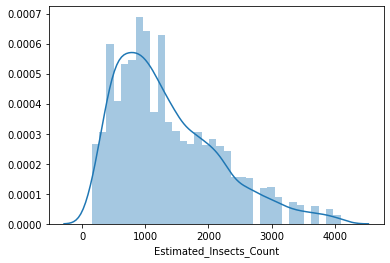

In [30]:
#plotting distribution of the required variabels in the dataset
sns.distplot(ds_ag["Estimated_Insects_Count"])

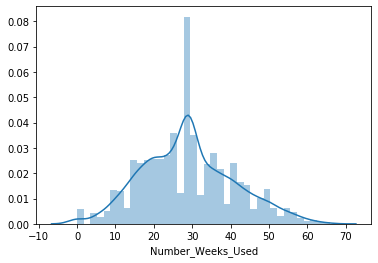

In [31]:
sns.distplot(ds_ag["Number_Weeks_Used"])

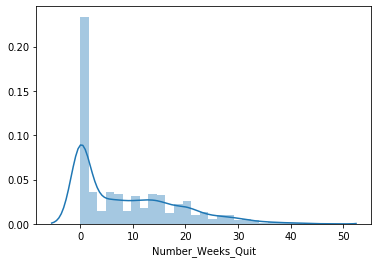

In [32]:
sns.distplot(ds_ag["Number_Weeks_Quit"])

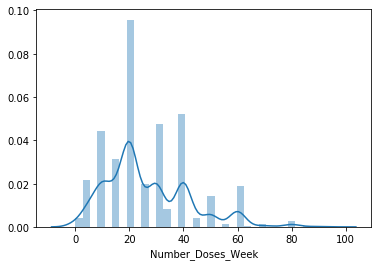

In [33]:
sns.distplot(ds_ag["Number_Doses_Week"])

### Plotting Outliers

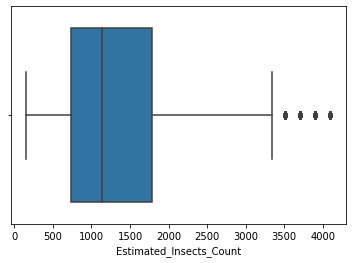

In [34]:
#plotting outliers of the required variabels in the dataset
sns.boxplot(ds_ag["Estimated_Insects_Count"])

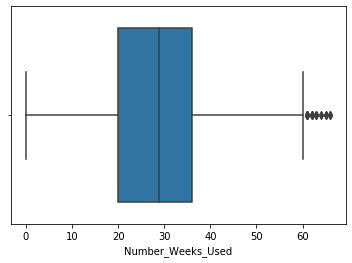

In [35]:
sns.boxplot(ds_ag["Number_Weeks_Used"])

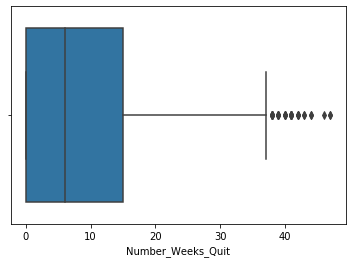

In [36]:
sns.boxplot(ds_ag["Number_Weeks_Quit"])

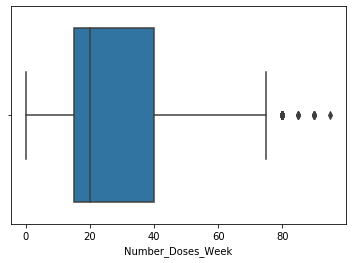

In [37]:
sns.boxplot(ds_ag["Number_Doses_Week"])

### Checking Skewness

In [38]:
ds_ag.skew()

Estimated_Insects_Count    0.948378
Crop_Type                  1.362628
Soil_Type                  0.111273
Pesticide_Use_Category     0.543183
Number_Doses_Week          0.929452
Number_Weeks_Used          0.266335
Number_Weeks_Quit          0.972163
Season                     0.147252
Crop_Damage                1.318789
Source                     1.448272
dtype: float64

### Seperating Training and Testing Data

In [39]:
#calling out the training DataSet
TrainFinal=ds_ag.loc[ds_ag['Source']=='50']  #50 implies training data
TrainFinal

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Source
0,188,1,0,1,0,0.000000,0,1,0,50
1,209,1,0,1,0,0.000000,0,2,1,50
2,257,1,0,1,0,0.000000,0,2,1,50
3,257,1,1,1,0,0.000000,0,2,1,50
4,342,1,0,1,0,0.000000,0,2,1,50
...,...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,28.920374,1,1,1,50
4595,2139,0,1,2,30,47.000000,2,1,1,50
4596,2267,0,1,2,10,7.000000,27,2,0,50
4597,2267,0,1,2,10,20.000000,24,2,0,50


### Dropping Unwanted Training Column

In [40]:
#droppping columns fro the training dataset
TrainFinal.drop(['Source'],axis=1,inplace=True)

In [41]:
TrainFinal.shape

(4599, 9)

In [42]:
#calling out the testing DataFrame
TestFinal=ds_ag.loc[ds_ag['Source']=='100']
TestFinal

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Source
0,188,1,1,1,0,28.920374,0,2,5,100
1,410,1,1,1,0,0.000000,0,2,5,100
2,626,1,0,1,0,0.000000,0,2,5,100
3,731,1,0,1,0,0.000000,0,2,5,100
4,789,0,0,1,0,0.000000,0,1,5,100
...,...,...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34.000000,7,3,5,100
1195,1132,0,1,2,40,25.000000,3,1,5,100
1196,1132,0,1,2,20,13.000000,23,1,5,100
1197,1212,0,1,2,10,35.000000,5,1,5,100


### Dropping Unwanted Testing Column 

In [43]:
#dropping columns from the testing dataset
TestFinal.drop(['Source'],axis=1,inplace=True)
TestFinal.drop(['Crop_Damage'],axis=1,inplace=True)

In [44]:
TestFinal.shape

(1199, 8)

### Removing Outliers

In [45]:
#using Zscore to remove the outliers
from scipy.stats import zscore
z=np.abs(zscore(TrainFinal))
threshold=3
print(np.where(z>3))
TrainFinal_new=TrainFinal[(z<3).all(axis=1)]
print(TrainFinal.shape)
print(TrainFinal_new.shape)

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
        167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
        264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
        374,  375,  377,  384,  453,  458,  466,  480,  510,  517,  522,
        557,  595,  612,  634,  693,  702,  703,  704,  705,  706,  807,
        819,  855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067,
       1097, 1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339,
       1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349,
       1406, 1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868,
       2019, 2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183,
       2185, 2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553,
       2565, 2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702,
       2710, 2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806,
       2814, 2828, 2829, 2834, 2841, 2842, 2851, 2

### Seperating Target and Input Variables

In [46]:
#seperating Target and input variable from the train dataset
x=TrainFinal_new.drop(['Crop_Damage'],axis=1)

In [47]:
#calling out input variable
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,0,1,0,0.000000,0,1
1,209,1,0,1,0,0.000000,0,2
2,257,1,0,1,0,0.000000,0,2
3,257,1,1,1,0,0.000000,0,2
4,342,1,0,1,0,0.000000,0,2
...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,28.920374,1,1
4595,2139,0,1,2,30,47.000000,2,1
4596,2267,0,1,2,10,7.000000,27,2
4597,2267,0,1,2,10,20.000000,24,2


In [48]:
#calling out target variable
y=TrainFinal_new['Crop_Damage']
y

0       0
1       1
2       1
3       1
4       1
       ..
4594    1
4595    1
4596    0
4597    0
4598    0
Name: Crop_Damage, Length: 4370, dtype: int64

### Fixing Skewness

In [49]:
#using log transformation technique to reduce data skewness for the input variables
for i in x.columns:
    if x[i].skew()>.55:
        x[i]=np.log1p(x[i])

### Re-checking Skewness

In [50]:
x.skew()

Estimated_Insects_Count   -0.543203
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.518158
Number_Doses_Week         -1.181035
Number_Weeks_Used          0.274590
Number_Weeks_Quit         -0.234282
Season                     0.141605
dtype: float64

### Scaling Input Variables

In [51]:
#using standard scaler to scale input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7
0,-2.695817,1.848947,-0.960945,-3.535757,-4.818909,-2.445910,-1.298139,-1.288559
1,-2.534195,1.848947,-0.960945,-3.535757,-4.818909,-2.445910,-1.298139,0.147555
2,-2.218420,1.848947,-0.960945,-3.535757,-4.818909,-2.445910,-1.298139,0.147555
3,-2.218420,1.848947,1.040642,-3.535757,-4.818909,-2.445910,-1.298139,0.147555
4,-1.781584,1.848947,-0.960945,-3.535757,-4.818909,-2.445910,-1.298139,0.147555
...,...,...,...,...,...,...,...,...
4365,1.026175,-0.540848,1.040642,-0.573432,-0.119103,0.025619,-0.759935,-1.288559
4366,1.026892,-0.540848,1.040642,-0.573432,0.482111,1.570700,-0.445105,-1.288559
4367,1.116005,-0.540848,1.040642,-0.573432,-1.117296,-1.847691,1.289201,0.147555
4368,1.116005,-0.540848,1.040642,-0.573432,-1.117296,-0.736714,1.201206,0.147555


In [52]:
#checking for Null values
x.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

### Calling out Training and Testing Data

In [53]:
#using train_test_split to seperate training and testing data
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3496, 8)
(874, 8)
(3496,)
(874,)


### Binarizing Target Variable

In [54]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test,pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    pred = lb.transform(pred)
    return roc_auc_score(y_test, pred, average=average)

### Importing Classification Algorithims and Metrices

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

### Assigning Aliases

In [56]:
SVC=SVC()
GNB=GaussianNB()
KNC=KNeighborsClassifier()
DTC=DecisionTreeClassifier()
ABC=AdaBoostClassifier()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ETC=ExtraTreesClassifier()

### Appending Models

In [57]:
models=[]
models.append(("SVC",SVC))
models.append(("GaussianNB",GNB))
models.append(("DecisionTreeClassifier",DTC))
models.append(("KNeighborsClassifier",KNC))
models.append(("AdaBoostClassifier",ABC))
models.append(("RandomForestClassifier",RFC))
models.append(("GradientBoostingClassifier",GBC))
models.append(("ExtraTreesClassifier",ETC))

### Machine Learning

#### KNearest Neighbor Classifier

Accuracy score is: 0.8409610983981693


Cross_val_score is: 0.7974828375286042


Multiclass_roc_auc_score is: 0.5876021505376344


Classification_report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       750
           1       0.40      0.23      0.29       124

    accuracy                           0.84       874
   macro avg       0.64      0.59      0.60       874
weighted avg       0.81      0.84      0.82       874



Confusion_matirx
[[706  44]
 [ 95  29]]


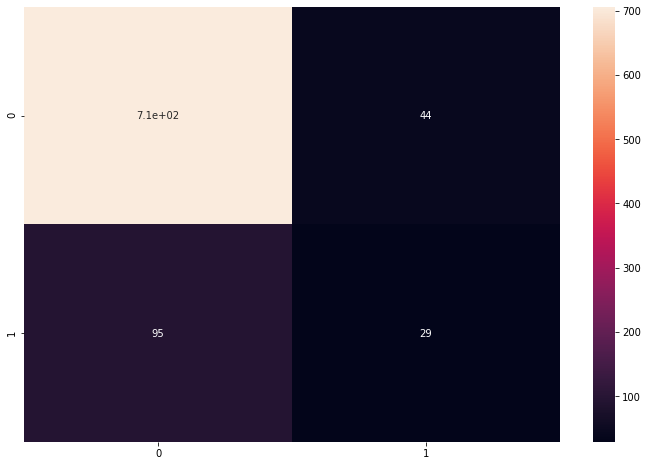

In [75]:
KNC.fit(x_train,y_train)
pred=KNC.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,pred))
print("\n")
print("Cross_val_score is:",cross_val_score(KNC,x,y,cv=10).mean())
print("\n")
print("Multiclass_roc_auc_score is:",multiclass_roc_auc_score(y_test,pred))
print("\n")
print("Classification_report")
print(classification_report(y_test,pred))
print("\n")
print("Confusion_matirx")
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)
print(cm)

#### SVC

Accuracy score is: 0.8558352402745996


Cross_val_score is: 0.8336384439359268


Multiclass_roc_auc_score is: 0.5289569892473118


Classification_report
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       750
           1       0.45      0.07      0.12       124

    accuracy                           0.86       874
   macro avg       0.66      0.53      0.52       874
weighted avg       0.81      0.86      0.81       874



Confusion_matirx
[[739  11]
 [115   9]]


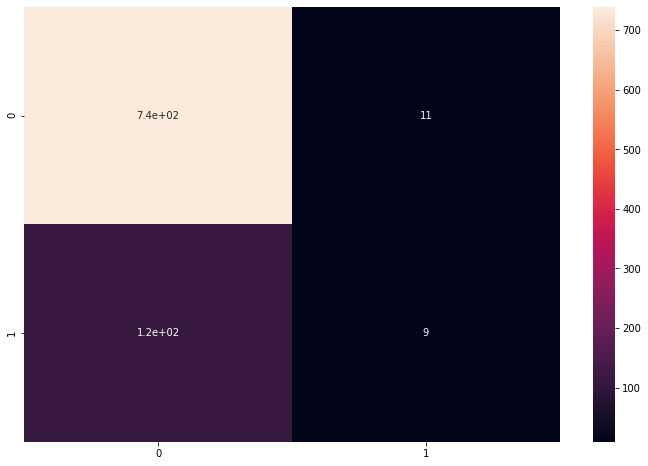

In [59]:
SVC.fit(x_train,y_train)
pred=SVC.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,pred))
print("\n")
print("Cross_val_score is:",cross_val_score(SVC,x,y,cv=10).mean())
print("\n")
print("Multiclass_roc_auc_score is:",multiclass_roc_auc_score(y_test,pred))
print("\n")
print("Classification_report")
print(classification_report(y_test,pred))
print("\n")
print("Confusion_matirx")
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)
print(cm)

#### Decision Tree Classifier

Accuracy score is: 0.7643020594965675


Cross_val_score is: 0.7210526315789474


Multiclass_roc_auc_score is: 0.5866881720430107


Classification_report
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       750
           1       0.25      0.34      0.29       124

    accuracy                           0.76       874
   macro avg       0.57      0.59      0.57       874
weighted avg       0.79      0.76      0.78       874



Confusion_matirx
[[626 124]
 [ 82  42]]


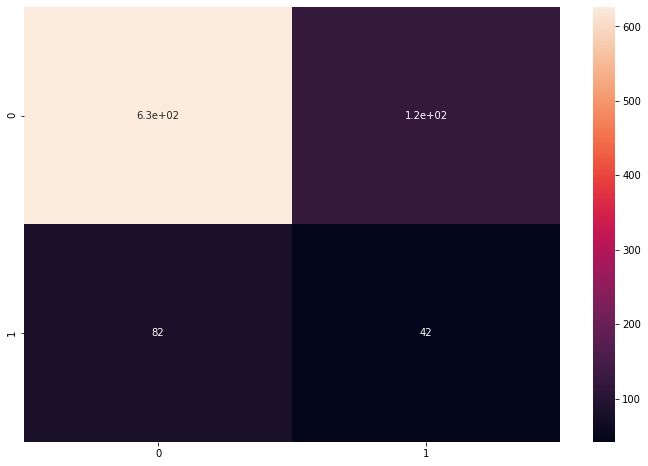

In [60]:
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,pred))
print("\n")
print("Cross_val_score is:",cross_val_score(DTC,x,y,cv=10).mean())
print("\n")
print("Multiclass_roc_auc_score is:",multiclass_roc_auc_score(y_test,pred))
print("\n")
print("Classification_report")
print(classification_report(y_test,pred))
print("\n")
print("Confusion_matirx")
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)
print(cm)

#### Gaussian Naive Bayes

Accuracy score is: 0.816933638443936


Cross_val_score is: 0.7713958810068651


Multiclass_roc_auc_score is: 0.6005268817204301


Classification_report
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       750
           1       0.34      0.30      0.32       124

    accuracy                           0.82       874
   macro avg       0.61      0.60      0.61       874
weighted avg       0.81      0.82      0.81       874



Confusion_matirx
[[677  73]
 [ 87  37]]


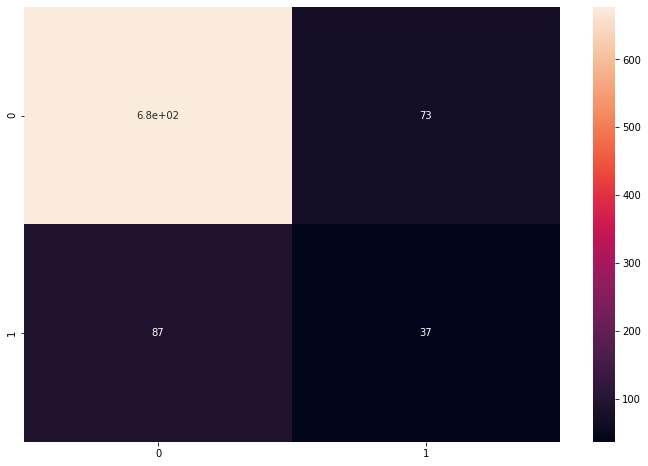

In [61]:
GNB.fit(x_train,y_train)
pred=GNB.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,pred))
print("\n")
print("Cross_val_score is:",cross_val_score(GNB,x,y,cv=10).mean())
print("\n")
print("Multiclass_roc_auc_score is:",multiclass_roc_auc_score(y_test,pred))
print("\n")
print("Classification_report")
print(classification_report(y_test,pred))
print("\n")
print("Confusion_matirx")
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)
print(cm)

#### Random Forest Classifier

Accuracy score is: 0.8443935926773455


Cross_val_score is: 0.8043478260869564


Multiclass_roc_auc_score is: 0.5660430107526881


Classification_report
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       750
           1       0.39      0.18      0.24       124

    accuracy                           0.84       874
   macro avg       0.63      0.57      0.58       874
weighted avg       0.81      0.84      0.82       874



Confusion_matirx
[[716  34]
 [102  22]]


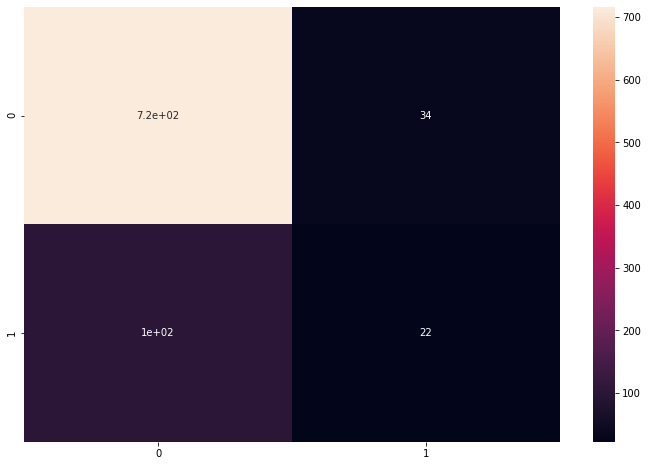

In [62]:
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,pred))
print("\n")
print("Cross_val_score is:",cross_val_score(RFC,x,y,cv=10).mean())
print("\n")
print("Multiclass_roc_auc_score is:",multiclass_roc_auc_score(y_test,pred))
print("\n")
print("Classification_report")
print(classification_report(y_test,pred))
print("\n")
print("Confusion_matirx")
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)
print(cm)

#### Gradient Boosting Classifier

Accuracy score is: 0.816933638443936


Cross_val_score is: 0.7713958810068651


Multiclass_roc_auc_score is: 0.6005268817204301


Classification_report
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       750
           1       0.34      0.30      0.32       124

    accuracy                           0.82       874
   macro avg       0.61      0.60      0.61       874
weighted avg       0.81      0.82      0.81       874



Confusion_matirx
[[677  73]
 [ 87  37]]


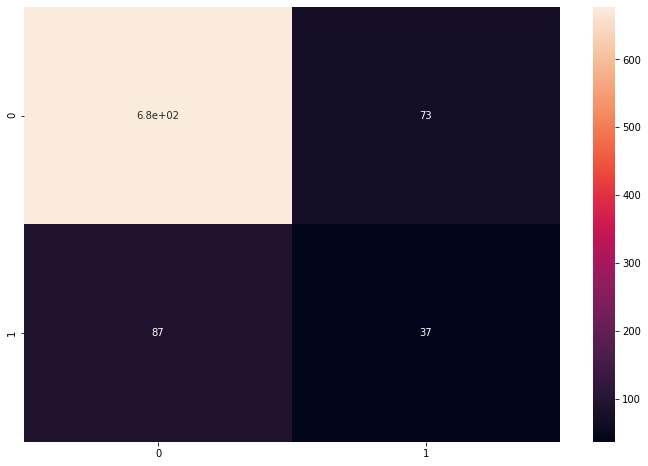

In [63]:
GNB.fit(x_train,y_train)
pred=GNB.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,pred))
print("\n")
print("Cross_val_score is:",cross_val_score(GNB,x,y,cv=10).mean())
print("\n")
print("Multiclass_roc_auc_score is:",multiclass_roc_auc_score(y_test,pred))
print("\n")
print("Classification_report")
print(classification_report(y_test,pred))
print("\n")
print("Confusion_matirx")
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)
print(cm)

#### AdaBoost Classifier

Accuracy score is: 0.8443935926773455


Cross_val_score is: 0.8377574370709382


Multiclass_roc_auc_score is: 0.5458494623655913


Classification_report
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       750
           1       0.36      0.13      0.19       124

    accuracy                           0.84       874
   macro avg       0.62      0.55      0.55       874
weighted avg       0.80      0.84      0.81       874



Confusion_matirx
[[722  28]
 [108  16]]


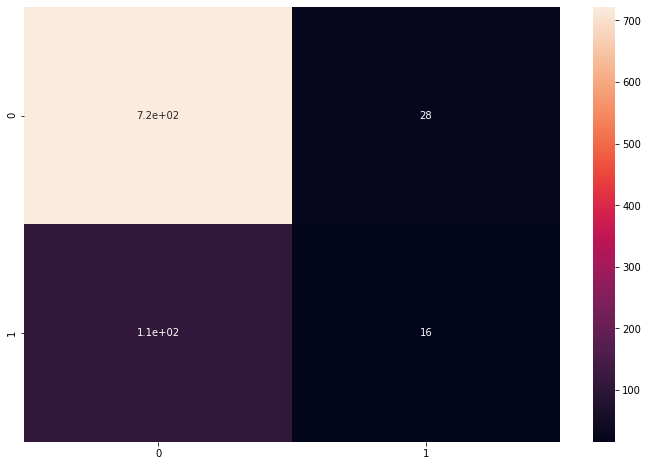

In [64]:
ABC.fit(x_train,y_train)
pred=ABC.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,pred))
print("\n")
print("Cross_val_score is:",cross_val_score(ABC,x,y,cv=10).mean())
print("\n")
print("Multiclass_roc_auc_score is:",multiclass_roc_auc_score(y_test,pred))
print("\n")
print("Classification_report")
print(classification_report(y_test,pred))
print("\n")
print("Confusion_matirx")
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)
print(cm)

#### Extra Trees Classifier

Accuracy score is: 0.8386727688787186


Cross_val_score is: 0.8013729977116706


Multiclass_roc_auc_score is: 0.5694408602150538


Classification_report
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       750
           1       0.37      0.19      0.25       124

    accuracy                           0.84       874
   macro avg       0.62      0.57      0.58       874
weighted avg       0.80      0.84      0.82       874



Confusion_matirx
[[709  41]
 [100  24]]


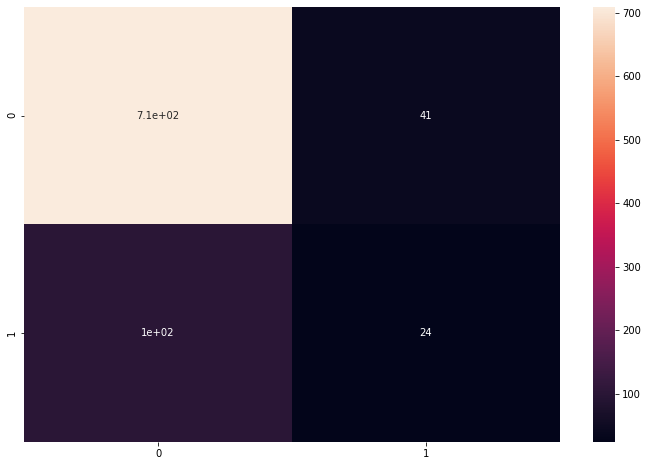

In [65]:
ETC.fit(x_train,y_train)
pred=ETC.predict(x_test)
print("Accuracy score is:",accuracy_score(y_test,pred))
print("\n")
print("Cross_val_score is:",cross_val_score(ETC,x,y,cv=10).mean())
print("\n")
print("Multiclass_roc_auc_score is:",multiclass_roc_auc_score(y_test,pred))
print("\n")
print("Classification_report")
print(classification_report(y_test,pred))
print("\n")
print("Confusion_matirx")
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)
print(cm)

### Framing Compare Table

In [66]:
Model=[]
ac=[]
cvs=[]
ras=[]
for name,model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    ac.append(accuracy_score(y_test, y_pred))
    re=cross_val_score(model,x,y,cv=10,scoring="accuracy").mean()
    ras.append(multiclass_roc_auc_score(y_test,y_pred))
    cvs.append(re)
    Model.append(name)
result=pd.DataFrame({"Model":Model,"Accuracy_score":ac,"cross_val_score":cvs,"Roc_auc_score":ras})
result

,Model,Accuracy_score,cross_val_score,Roc_auc_score
0,SVC,0.855835,0.833638,0.528957
1,GaussianNB,0.816934,0.771396,0.600527
2,DecisionTreeClassifier,0.763158,0.719451,0.582656
3,KNeighborsClassifier,0.840961,0.797483,0.587602
4,AdaBoostClassifier,0.844394,0.837757,0.545849
5,RandomForestClassifier,0.843249,0.807094,0.558645
6,GradientBoostingClassifier,0.855835,0.821281,0.562613
7,ExtraTreesClassifier,0.836384,0.795423,0.571473


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
parameterSVC={"kernel":["rbf","poly","linear"],
            "C":[1,10,100,1000]}
gridSVC=GridSearchCV(SVC,param_grid=parameterSVC,n_jobs=-1,cv=5)
gridSVC.fit(x_train,y_train)
gridSVC.best_score_,gridSVC.best_params_

### Saving Model

In [69]:
import joblib
joblib.dump(SVC,"Model_Agriculture_SVC.csv")

['Model_Agriculture_SVC.csv']

### Loading Model

In [70]:
Model_Agriculture=joblib.load("Model_Agriculture_SVC.csv")

### Using Model

In [71]:
Model_Agriculture.predict(TestFinal)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)